# **Haroon Bacha**
7th Sem
BSDS(B)

In [8]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

# --- EXPERIMENT 1: Easy Dataset (High class separation) ---
X_easy, y_easy = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                                     n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=30)

In [9]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def predict(X, w, b):
    """Calculates the prediction probability (y_hat)."""
    # Linear combination: z = X * w + b
    z = np.dot(X, w) + b
    # Activation: sigmoid(z)
    return sigmoid(z)

In [10]:
def fit(X, y, epochs=5, lr=0.01):
    """
    Trains the linear classifier using Stochastic Gradient Descent (SGD).
    The error calculation (y_pred - y[i]) serves as the gradient for the update rule
    in the context of logistic regression/perceptron trick.
    """
    w = np.zeros(X.shape[1]) # Initialize weights (w1, w2)
    b = 0 # Initialize bias

    # Stochastic Gradient Descent (SGD) loop
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            y_pred = predict(X[i], w, b)

            # Error calculation
            error = y_pred - y[i]

            # Update weights and bias
            w = w - lr * error * X[i]
            b = b - lr * error

    return w, b

In [11]:
def plot_db(X, y, w, b, title_suffix):
    """Plots the data points and the learned decision boundary."""
    plt.figure(figsize=(8, 6))

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', marker='o')

    # Calculate the decision boundary line: x2 = (-w1/w2)*x1 - (b/w2)
    x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    x2 = (-w[0] * x1 - b) / w[1]

    # Plot the decision boundary
    plt.plot(x1, x2, color='red', linestyle='-', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Learned Decision Boundary: {title_suffix}')
    plt.legend()
    plt.grid(True)
    plt.show() # Use plt.show() in a notebook cell to display the plot

--- Results for Easy Dataset (class_sep=30) ---
Final Weights (w_easy): [2.09751931 0.06447328]
Final Bias (b_easy): 1.8515797421012627


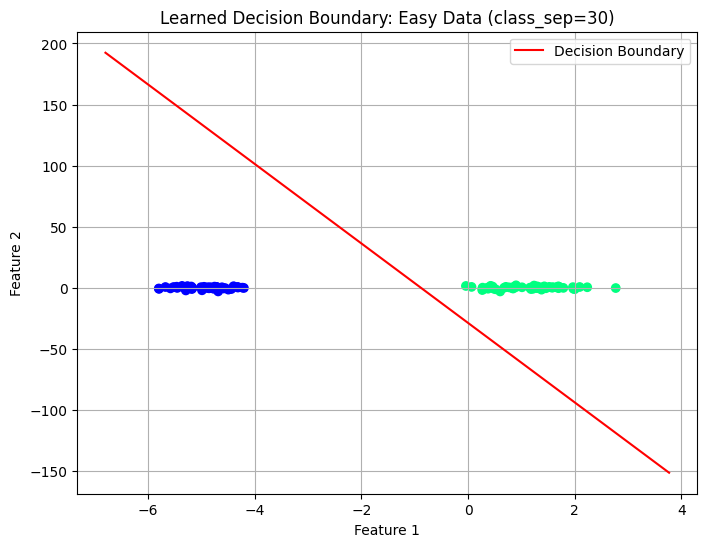

In [12]:
# Train the model on the Easy Dataset (class_sep=30)
w_easy, b_easy = fit(X_easy, y_easy, epochs=5, lr=0.1)

print(f"--- Results for Easy Dataset (class_sep=30) ---")
print(f"Final Weights (w_easy): {w_easy}")
print(f"Final Bias (b_easy): {b_easy}")

plot_db(X_easy, y_easy, w_easy, b_easy, "Easy Data (class_sep=30)")


--- Results for Hard Dataset (class_sep=0.5) ---
Final Weights (w_hard): [0.32464392 4.39871186]
Final Bias (b_hard): -0.6754495644563447


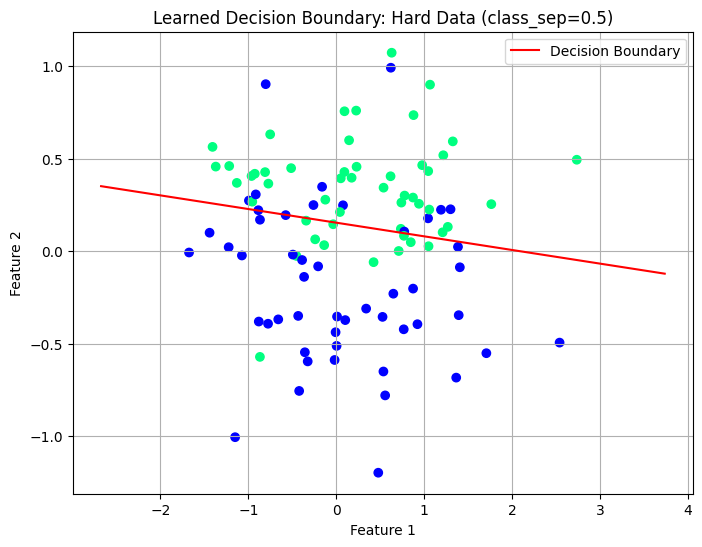

In [13]:
# --- EXPERIMENT 2: Hard Dataset (Low class separation) ---
X_hard, y_hard = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                                     n_classes=2, n_clusters_per_class=1, random_state=42, hypercube=False, class_sep=0.5)

# Train the model on the Hard Dataset (requires more epochs)
w_hard, b_hard = fit(X_hard, y_hard, epochs=50, lr=0.1)

print(f"\n--- Results for Hard Dataset (class_sep=0.5) ---")
print(f"Final Weights (w_hard): {w_hard}")
print(f"Final Bias (b_hard): {b_hard}")

plot_db(X_hard, y_hard, w_hard, b_hard, "Hard Data (class_sep=0.5)")


--- Results for Low LR (lr=0.001, epochs=200) ---
Final Weights (w_low_lr): [1.71966153 0.05367465]
Final Bias (b_low_lr): 1.2287841205888739


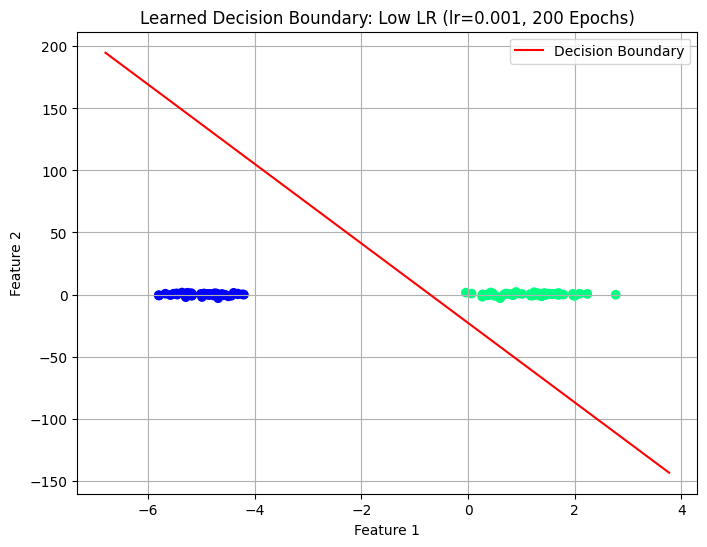

In [14]:
# --- EXPERIMENT 3: Low Learning Rate (lr=0.001) on Easy Data ---
# Resetting data to the Easy Dataset (class_sep=30)
X_low_lr, y_low_lr = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                                         n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=30)

# Requires a very high number of epochs to converge due to the small steps
w_low_lr, b_low_lr = fit(X_low_lr, y_low_lr, epochs=200, lr=0.001)

print(f"\n--- Results for Low LR (lr=0.001, epochs=200) ---")
print(f"Final Weights (w_low_lr): {w_low_lr}")
print(f"Final Bias (b_low_lr): {b_low_lr}")

plot_db(X_low_lr, y_low_lr, w_low_lr, b_low_lr, "Low LR (lr=0.001, 200 Epochs)")


--- Results for High LR (lr=1.5, epochs=5) ---
Final Weights (w_high_lr): [3.24370164 0.09390981]
Final Bias (b_high_lr): 4.0279708057310035


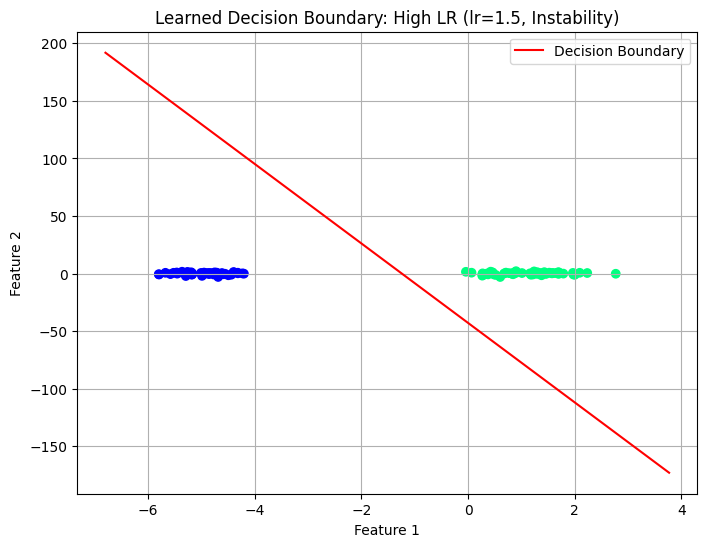

In [15]:
# --- EXPERIMENT 4: Very High Learning Rate (lr=1.5) on Easy Data ---
# Using the Easy Dataset again to show the instability
X_high_lr = X_easy
y_high_lr = y_easy

# With such a high LR, the weights will jump around significantly
w_high_lr, b_high_lr = fit(X_high_lr, y_high_lr, epochs=5, lr=1.5)

print(f"\n--- Results for High LR (lr=1.5, epochs=5) ---")
print(f"Final Weights (w_high_lr): {w_high_lr}")
print(f"Final Bias (b_high_lr): {b_high_lr}")

plot_db(X_high_lr, y_high_lr, w_high_lr, b_high_lr, "High LR (lr=1.5, Instability)")


--- Results for Scaled Features ---
Final Weights (w_scaled): [0.86280572 0.06781154]
Final Bias (b_scaled): 0.15554231789577794


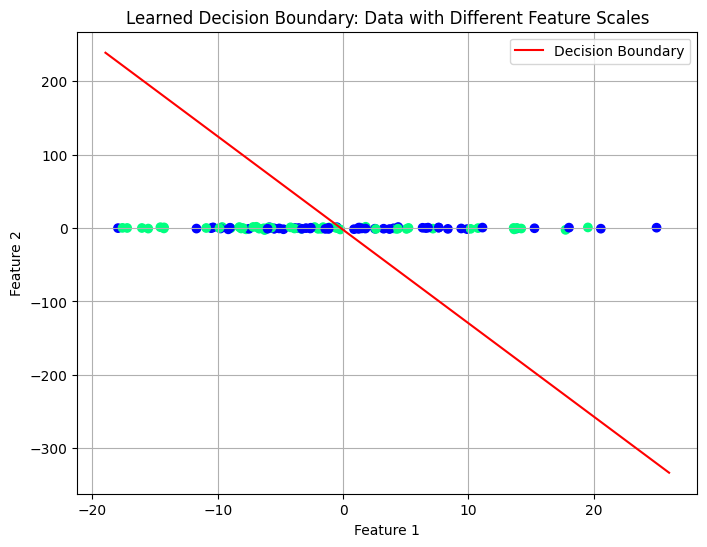

In [16]:
# --- EXPERIMENT 5: Different Feature Scales (Wider Data) ---
X_scaled, y_scaled = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                                         n_classes=2, n_clusters_per_class=1, random_state=10, hypercube=False, class_sep=1.0)

# Manually scale the first feature (x-axis) to be much wider
X_scaled[:, 0] = X_scaled[:, 0] * 10

# Run the fit function
w_scaled, b_scaled = fit(X_scaled, y_scaled, epochs=50, lr=0.1)

print(f"\n--- Results for Scaled Features ---")
print(f"Final Weights (w_scaled): {w_scaled}")
print(f"Final Bias (b_scaled): {b_scaled}")

plot_db(X_scaled, y_scaled, w_scaled, b_scaled, "Data with Different Feature Scales")